# Title: Mapping Housing Burden and Destroyed Homes in the Eaton Fire

Our goal for this individual coding assignment is to advance our group research project regarding renter vulnerability and housing burden of the neighborhoods affected by the wildfires. For this assignment, we are going to focus on the Eaton fires in Altadena. We are going to do this by:

1) Making "bad" and "good" maps
2) Producing static and interactive maps
3) Creating data overlays

A specific goal we have for our assignment this week is to showcase the reality that making maps, or cartography, is both an **art** and **science**. Though we have to use reliable data (i.e., the science part), each cartographer has a different way of producing maps (i.e., the art part). Though there is no "correct" way of visualizing spatial relationships, there is certain implications when we try to manipulate (e.g., subsetting) data in order to prove a point. The power of map-making lies in convincing the audience about a particular topic. Most of the time, to persuade them, maps are (un)intentionally created to be misleading. We will demonstrate this throughout the assignment.

# By: Bryzen Enzo Morales

In [21]:
# loading necessary libraries

import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import folium

%matplotlib inline

# I) Mapping Damages

In [2]:
# importing the data 

eaton_fire = gpd.read_file('/home/jovyan/UP221-bryzen/data/eaton_fire.geojson')

In [3]:
# looking at the head of the data

eaton_fire.head()

,OBJECTID,GLOBALID,DAMAGE,STRUCTURETYPE,geometry
0,1,da82e80c-ada4-4e58-9a42-07b20e48b868,No Damage,Single Family Residence Multi Story,POINT (-118.09754 34.17498)
1,2,a6839b8e-157a-41fb-8aab-b35095b1e4ea,No Damage,Single Family Residence Multi Story,POINT (-118.11334 34.18566)
2,3,1fe4c4eb-8f02-4251-8487-1aaa27e14d25,Affected (1-9%),Single Family Residence Single Story,POINT (-118.11356 34.1857)
3,4,db9534b1-cb22-4bef-a29d-1595d191c443,No Damage,Utility Misc Structure,POINT (-118.09772 34.17498)
4,5,f76e2296-7507-4684-8231-68d501ef4fb1,No Damage,Single Family Residence Single Story,POINT (-118.09749 34.17506)


Right now, the data gave us the "Damage" of a particular housing unit. Let's try to map these points out using an interactive map, so we can easily navigate the spatial distribution of these fire damage.

In [4]:
# setting up the data as a GeoDataFrame based from the geopandas library

eaton_fire_df = gpd.GeoDataFrame(eaton_fire, geometry=eaton_fire['geometry'])

In [5]:
# checking the categorical values in the "DAMAGE" variable.

eaton_fire_df['DAMAGE'].value_counts()

DAMAGE
Destroyed (>50%)    9413
No Damage           7894
Affected (1-9%)      856
Minor (10-25%)       148
Major (26-50%)        70
Inaccessible          40
Name: count, dtype: int64

<Axes: >

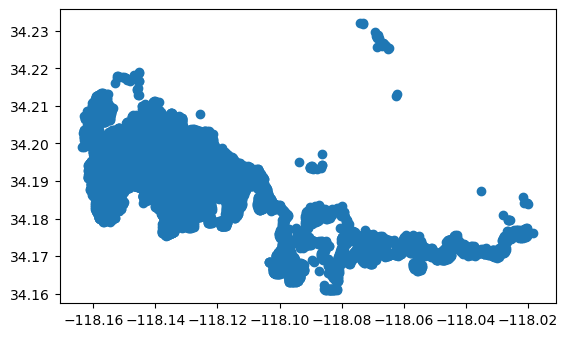

In [6]:
# initial plot

eaton_fire_df.plot()

Perfect! Now, it may be helpful to designate particular colors for each of the data point. This way, we can actually see the spatial distribution of the type of damage in the Eaton Fire. 

<Axes: >

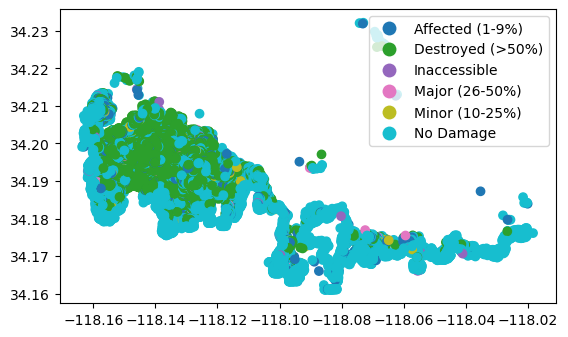

In [7]:
eaton_fire_df.plot(
            column = 'DAMAGE',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
            }                  # this puts the legend to the side
) 

We see an obvious pattern that the most destroyed are at the "center" of the fires. 

But, we can improve this map by using appropriate colors. It doesn't make sense that the "Destroyed" value has a "green" as a color designation. Let's make it an "ordinal" where the degree of the fire structural damage corresponds with a more "intuitive" color. Let's also make it interactive so we can navigate it freely!

In [20]:
# creating the map (guide for this code is at the sources)

from geopandas.explore import _categorical_legend

m = eaton_fire_df.explore(
    column = 'DAMAGE',
    cmap=['red','orangered','lightsalmon','coral','darksalmon','mistyrose'],
    tiles="CartoDB positron",
    style_kwds={'opacity':.40,'fillOpacity':.60},
    legend=False
)
_categorical_legend(
    m, 
    title="DAMAGE", 
    categories=[
        "Destroyed (>50%)",
        "Major (26-50%)",
        "Minor (10-25%)",
        "Affected (1-9%)",
        "No Damage",
        "Inaccessible"],
    colors=['red','orangered','lightsalmon','coral','darksalmon','mistyrose']
)

# saving the output 

m.save('damage_homes_eaton_fire.html')

Best map! (just kidding)... Now, we see, visually, that there seems to be a clustering of "damage" on the Eaton Canyon Fire. This is because it is intuitive to use the color "red" to illustrate "destruction."

Now, it may be interesting to try to understand the spatial distribution housing burden index by neighborhoods (i.e., using Census Tracts) on these "damaged" housing after the Eaton fire. We can see, then, the vulnerability, before these fires, of the residents in these neighborhoods.

# II) Layering Maps

Before we layer everything, let's make sure that the housing burden index variable exist in the dataset we exported from the week 3 assignment (by the way, we updated the code to export this dataset) and inspect its properties.

In [9]:
# importing the data from Week 3

index = gpd.read_file("/home/jovyan/UP221-bryzen/data/index_shp/index.shp")

In [10]:
# diagnosing the new file's feature

index.head()

,Geo_FIPS,Census Tra,Median Con,Median Mon,Total Rent,less than,"20,000 to","35,000 To","50,000 To",less tha_1,...,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Housing Bu,geometry
0,06037101110,Census Tract 1011.10,1468.0,1853.0,732,147,103,104,53,0.200820,...,037,101110,1400000US06037101110,06037101110,1011.10,CT,1142401,0,32.5,"POLYGON ((-118.30075 34.25961, -118.30076 34.2..."
1,06037101122,Census Tract 1011.22,2067.0,2273.0,240,22,27,34,39,0.091667,...,037,101122,1400000US06037101122,06037101122,1011.22,CT,2644045,0,14.8,"POLYGON ((-118.3032 34.27333, -118.2997 34.275..."
2,06037101210,Census Tract 1012.10,1276.0,1494.0,1896,545,266,223,160,0.287447,...,037,101210,1400000US06037101210,06037101210,1012.10,CT,650690,0,31.5,"POLYGON ((-118.29945 34.25598, -118.29104 34.2..."
3,06037101220,Census Tract 1012.20,1086.0,1361.0,822,262,114,161,19,0.318735,...,037,101220,1400000US06037101220,06037101220,1012.20,CT,698886,0,33.9,"POLYGON ((-118.28592 34.25589, -118.28498 34.2..."
4,06037101300,Census Tract 1013,2209.0,2094.0,190,9,33,25,8,0.047368,...,037,101300,1400000US06037101300,06037101300,1013,CT,2581214,0,18.6,"POLYGON ((-118.27822 34.25166, -118.27692 34.2..."


In [11]:
# converting the csv file from a pd data frame to a geojson dataframe: 
# specifying the geometry column

index_v2 = gpd.GeoDataFrame(index, geometry=index['geometry'])

index_v2.head()

,Geo_FIPS,Census Tra,Median Con,Median Mon,Total Rent,less than,"20,000 to","35,000 To","50,000 To",less tha_1,...,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Housing Bu,geometry
0,06037101110,Census Tract 1011.10,1468.0,1853.0,732,147,103,104,53,0.200820,...,037,101110,1400000US06037101110,06037101110,1011.10,CT,1142401,0,32.5,"POLYGON ((-118.30075 34.25961, -118.30076 34.2..."
1,06037101122,Census Tract 1011.22,2067.0,2273.0,240,22,27,34,39,0.091667,...,037,101122,1400000US06037101122,06037101122,1011.22,CT,2644045,0,14.8,"POLYGON ((-118.3032 34.27333, -118.2997 34.275..."
2,06037101210,Census Tract 1012.10,1276.0,1494.0,1896,545,266,223,160,0.287447,...,037,101210,1400000US06037101210,06037101210,1012.10,CT,650690,0,31.5,"POLYGON ((-118.29945 34.25598, -118.29104 34.2..."
3,06037101220,Census Tract 1012.20,1086.0,1361.0,822,262,114,161,19,0.318735,...,037,101220,1400000US06037101220,06037101220,1012.20,CT,698886,0,33.9,"POLYGON ((-118.28592 34.25589, -118.28498 34.2..."
4,06037101300,Census Tract 1013,2209.0,2094.0,190,9,33,25,8,0.047368,...,037,101300,1400000US06037101300,06037101300,1013,CT,2581214,0,18.6,"POLYGON ((-118.27822 34.25166, -118.27692 34.2..."


<Axes: >

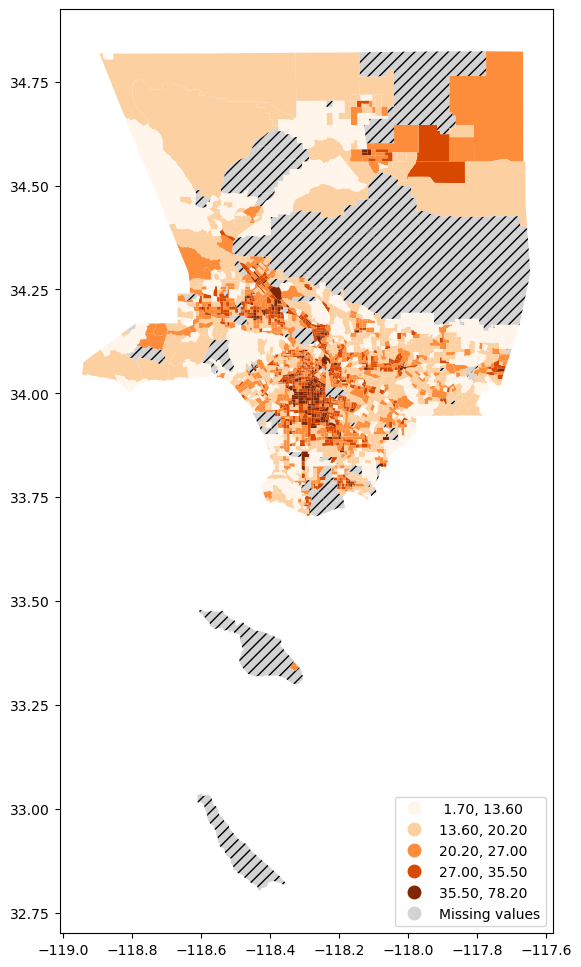

In [12]:
# mapping the housing burden variable

m_2 = index_v2.plot(
    figsize=(12,12),
    column = 'Housing Bu',
    scheme = "naturalbreaks",
    k = 5, 
    legend = True,
    legend_kwds={'loc': 'lower right'},
    cmap = 'Oranges',
    missing_kwds={
        "color": "lightgrey",
        "hatch": "///",
        "label": "Missing values"}
)

m_2

For me, this map is too much. We don't really need the whole Los Angeles County. What we need, however, is the census tracts or the neighborhoods affected by the fire. 

Therefore, now, it's time to overlay! To isolate the neighborhoods affected by the fire, we can: manually, determine the tracts or... we can  do an "inner" spatial join that only includes the geometries that exists at the "index" dataset and the "eaton_fire_df" dataset.

**IMPORTANT NOTE!!! Isolating these neighborhoods or tracts will definitely change the "relativeness" of the index. This is because the housing burden index is an index for neighborhoods relative to the whole state of California. Therefore, when we isolate the neighborhoods affected by the fire, it is crucial to understand that the chloropleth map uses an index for the isolated neighborhoods that is relative to California, and not, relative to one another.**

In [13]:
# performing an (INCORRECT) spatial join

gpd.sjoin(eaton_fire_df, index_v2).head()

# note: this was purposefully made to produce an error.

/tmp/ipykernel_2131/3406990202.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  gpd.sjoin(eaton_fire_df, index_v2).head()


,OBJECTID,GLOBALID,DAMAGE,STRUCTURETYPE,geometry,index_right,Geo_FIPS,Census Tra,Median Con,Median Mon,...,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Housing Bu
0,1,da82e80c-ada4-4e58-9a42-07b20e48b868,No Damage,Single Family Residence Multi Story,POINT (-118.09754 34.17498),1352,06037461200,Census Tract 4612,1686.0,2095.0,...,06,037,461200,1400000US06037461200,06037461200,4612,CT,2457595,0,11.8
1,2,a6839b8e-157a-41fb-8aab-b35095b1e4ea,No Damage,Single Family Residence Multi Story,POINT (-118.11334 34.18566),1352,06037461200,Census Tract 4612,1686.0,2095.0,...,06,037,461200,1400000US06037461200,06037461200,4612,CT,2457595,0,11.8
2,3,1fe4c4eb-8f02-4251-8487-1aaa27e14d25,Affected (1-9%),Single Family Residence Single Story,POINT (-118.11356 34.1857),1352,06037461200,Census Tract 4612,1686.0,2095.0,...,06,037,461200,1400000US06037461200,06037461200,4612,CT,2457595,0,11.8
3,4,db9534b1-cb22-4bef-a29d-1595d191c443,No Damage,Utility Misc Structure,POINT (-118.09772 34.17498),1352,06037461200,Census Tract 4612,1686.0,2095.0,...,06,037,461200,1400000US06037461200,06037461200,4612,CT,2457595,0,11.8
4,5,f76e2296-7507-4684-8231-68d501ef4fb1,No Damage,Single Family Residence Single Story,POINT (-118.09749 34.17506),1352,06037461200,Census Tract 4612,1686.0,2095.0,...,06,037,461200,1400000US06037461200,06037461200,4612,CT,2457595,0,11.8


Oh no! The CRS or the projections did not match! Let's convert the index's dataset CRS to match the eaton_fire_df dataset.

In [14]:
#converting the CRS for the index_v2 dataset

index_v3 = index_v2.to_crs(4326)

In [15]:
# performing a (CORRECT) spatial join

joined = gpd.sjoin(index_v3, eaton_fire_df)

joined.head()

,Geo_FIPS,Census Tra,Median Con,Median Mon,Total Rent,less than,"20,000 to","35,000 To","50,000 To",less tha_1,...,LSAD,ALAND,AWATER,Housing Bu,geometry,index_right,OBJECTID,GLOBALID,DAMAGE,STRUCTURETYPE
1271,06037430301,Census Tract 4303.01,1991.0,2303.0,235,9,8,8,24,0.038298,...,CT,24373515,73132,7.5,"POLYGON ((-118.02191 34.15705, -118.02128 34.1...",16404,16571,ed83fa97-c11b-4bc4-891a-4e17807591a7,Affected (1-9%),Infrastructure
1271,06037430301,Census Tract 4303.01,1991.0,2303.0,235,9,8,8,24,0.038298,...,CT,24373515,73132,7.5,"POLYGON ((-118.02191 34.15705, -118.02128 34.1...",16377,16540,81e2edb7-9525-4bec-9e00-37ddc4655ff3,No Damage,Infrastructure
1271,06037430301,Census Tract 4303.01,1991.0,2303.0,235,9,8,8,24,0.038298,...,CT,24373515,73132,7.5,"POLYGON ((-118.02191 34.15705, -118.02128 34.1...",16406,16573,1a0a5fd8-8b41-4161-a7bf-208567a776c8,No Damage,Infrastructure
1271,06037430301,Census Tract 4303.01,1991.0,2303.0,235,9,8,8,24,0.038298,...,CT,24373515,73132,7.5,"POLYGON ((-118.02191 34.15705, -118.02128 34.1...",16405,16572,3c4a6e3a-3304-4577-a3d7-40e929df830f,No Damage,Infrastructure
1273,06037430400,Census Tract 4304,2554.0,2515.0,317,37,0,10,39,0.116719,...,CT,3595207,7153,8.9,"POLYGON ((-118.03194 34.16693, -118.02967 34.1...",17358,17550,8e8da735-7afd-45c3-90f9-182e5c3f67a2,No Damage,Single Family Residence Multi Story


<Axes: >

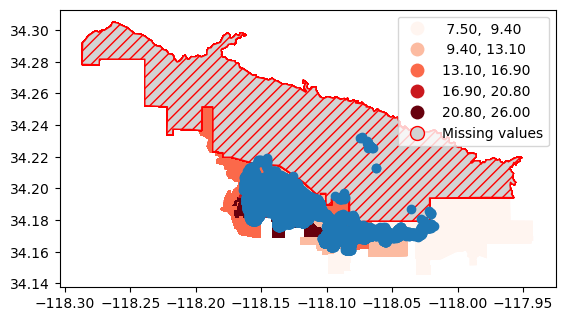

In [16]:
# creating a base of the graph 

base = joined.plot(
    column="Housing Bu",
    scheme="naturalbreaks",
    k=5, 
    legend = True,
    legend_kwds={'loc': 'upper right'},
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values"},
    cmap = 'Reds')

# mapping an overlay of the graph

m_3 = eaton_fire_df.plot(
    figsize = (10,12), 
    ax= base)

m_3

Yes! Successful. But, this map does not look interpretable. 

Additionally, earlier, we manually, an "ordinal" order of the values for the "DAMAGE." This may not work again, when we try to overlay these data point from a visual perspective, because there would be too many colors interacting with one another.

What we can do, for now, is to try and subset the data that were "destroyed" and find out if they belong to neighborhoods that has a high/low housing burden.

In [17]:
# subsetting the data where the "DAMAGE" is "destroyed"

destroyed_homes = eaton_fire_df[(eaton_fire_df['DAMAGE'] == 'Destroyed (>50%)')]

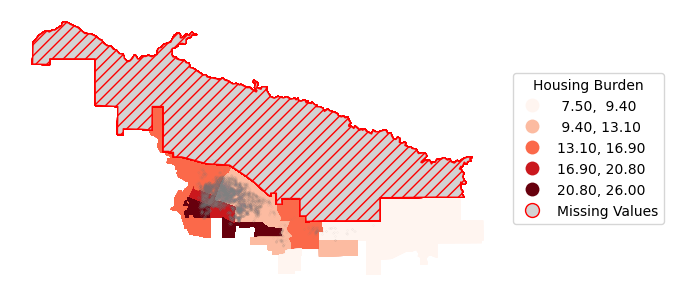

In [18]:
# running a chloropleth map of the Housing Burden again

base = joined.plot(
    column="Housing Bu",
    scheme="naturalbreaks",
    k=5, 
    legend = True,
    legend_kwds={'loc': 'center left',
                'title': 'Housing Burden',
                'bbox_to_anchor': (1, 0.5)},
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing Values"},
    cmap = 'Reds')

# mapping another overlay of the graph

m_4 = destroyed_homes.plot(
    figsize = (20,20), 
    ax = base,
    color = 'gray',
    marker = 'o',
    markersize = 0.0010,
    label = "Destroyed Homes"
)

m_4.set_axis_off()

Perfect! It is more interpretable, in comparison to the previous graphs we had. 

Moreover, we see that there seems to be clustering (i.e., based on visuals) of destroyed homes on neighborhoods with relatively low housing burden, in comparison to neighborhoods in California. 

# III) Conclusion and Recommendations

We see that the destroyed homes is scattered across neighborhoods with relatively low housing burden. We show that using the "appropriate colors" and spatially joining data can have critical impacts when we map our variables.

In order to prepare for the midterm, there are a few things we could add/improve:

1) **Creating a buffer zone.** The wildfires did not just affect the immediate neighborhoods, the surrounding neighborhoods may also be impacted as well. Though, a buffer zone using the geopandas library will complicate this because each tract is divided by a boundary, we may add more census tract in this analysis to fully capture the surrounding neighborhoods too, and outline the immediate neighborhoods to differentiate them.

2) **Adding demographic and other socioeconomic characteristics.** Adding other indicators can actually resolve our issue of "relative index." This is because these characteristics can serve as our consistent index so we can compare it better with only the affected neighborhoods/tracts.

# IV) Sources (For future references)

GeoPandas 
1) [Reordering items and manually assigning colors](https://stackoverflow.com/questions/70887834/geopandas-explore-reorder-items-in-legend)
2) [Another way of assigning colors](https://stackoverflow.com/questions/69891416/how-do-i-assign-custom-colors-to-values-as-points-using-geopandas)
3) [geopandas.GeoDataFrame.explore](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html)
4) [Choro Legends](https://geopandas.org/en/stable/gallery/choro_legends.html)
5) [Basic Mapping](https://geopandas.org/en/stable/docs/user_guide/mapping.html#maps-with-layers)

Matplotlib
1) [Colors](https://matplotlib.org/stable/gallery/color/named_colors.html)
2) [Another source](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

   